In [70]:
!pip install matplotlib-label-lines
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.69 s (started: 2022-10-26 14:53:35 +00:00)


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math
from scipy.integrate import odeint
from labellines import labelLine, labelLines
from scipy.optimize import fsolve

# create grid for different subplots
from matplotlib import gridspec
import seaborn as sns


time: 1.26 ms (started: 2022-10-26 14:53:41 +00:00)


# Question 1:
Plot all the solutions for density in the same plot using mathplotlib. 

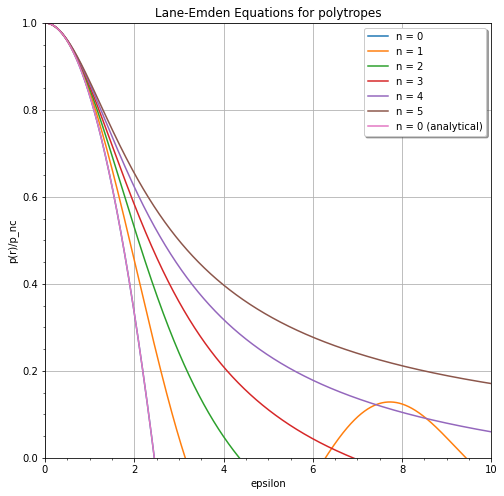

time: 323 ms (started: 2022-10-26 14:53:41 +00:00)


In [72]:
# Define the function that returns the two first derivatives of the system of linear ODE
def func(y,x,n):
  theta, omega = y
  dydt = [omega, -(2./x)*omega - theta**n]
  return dydt

# Initial conditions
init = [1.,0.]

# Spatial discretization
x = np.linspace(0.001,10,10000)

plt.figure(figsize=(8,8))

#Calculate ODE
for n in range(6):
  sol = odeint(func, init, x, args = (n,))
  plt.plot(x ,sol[:,0], label = "n = " + str(n))

#for n = 0, analytical solution
n=0
sol0_ana = 1. - (1./6.)*x**2
plt.plot(x, sol0_ana, label= "n = 0 (analytical)")

#Plotting and formatt
plt.ylim(0,1.)
plt.xlim(0,10)
plt.title('Lane-Emden Equations for polytropes')
plt.xlabel('epsilon')
plt.ylabel('p(r)/p_nc')
legend = plt.legend(loc='upper right',shadow='True')
plt.minorticks_on()
plt.grid()
plt.show()

# Question 2:
Answer: Comparing the analytical and the numerical solution for n = 0, the values of density agree with each other.

#Question 3: 
Plot all the dimensionless solutions for temperature and pressure


#Temperature and Pressure Profile

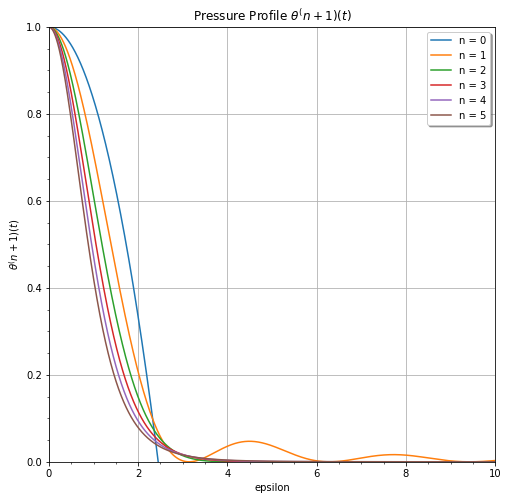

time: 385 ms (started: 2022-10-26 14:53:42 +00:00)


In [73]:
#Pressure Profile
plt.figure(figsize=(8,8))

for n in range(6):
  sol = odeint(func, init, x, args = (n,))
  pres = sol[:,0]**(n+1)
  plt.plot(x ,pres, label = "n = " + str(n))

#Plotting and formatt
plt.ylim(0,1)
plt.xlim(0,10)
plt.title('Pressure Profile $\\theta^(n+1)(t)$')
plt.xlabel('epsilon')
plt.ylabel('$\\theta^(n+1)(t)$')
legend = plt.legend(loc='upper right',shadow='True')
plt.minorticks_on()
plt.grid()
plt.show()


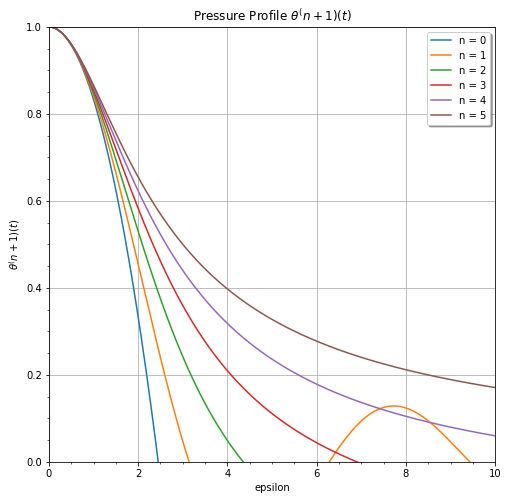

time: 450 ms (started: 2022-10-26 14:53:42 +00:00)


In [74]:
#Temperature Profile
plt.figure(figsize=(8,8))

for n in range(6):
  sol = odeint(func, init, x, args = (n,))
  temp = sol[:,0]
  plt.plot(x ,temp, label = "n = " + str(n))

#Plotting and formatt
plt.ylim(0,1)
plt.xlim(0,10)
plt.title('Pressure Profile $\\theta^(n+1)(t)$')
plt.xlabel('epsilon')
plt.ylabel('$\\theta^(n+1)(t)$')
legend = plt.legend(loc='upper right',shadow='True')
plt.minorticks_on()
plt.grid()
plt.show()


#Question 4
Plot the physical density and temperature versus r/R_sun. Compare values for central density and temperature deduced by the polytropic model to currently accepted values p0 = 158 g/cm and T0 = 15.7x10^6 K.
Use these accepted values to make the final temperature and density plots.

In [75]:
# Spatial discretization
x = np.linspace(0.001,10,10000)

n = 3
sol3 = odeint(func, init, x, args = (n,))
theta = sol3[:,0][sol3[:,0]>0]              #Truncate negative values of theta
root_index = np.where(theta <= 1e-4)[0][0]  #Get the index of the root 
e3 = x[root_index]                          #Get value of the index on x-axis
theta1 = sol3[:,1][root_index]

#Givens
M_sun = 1.99e33       #g
R_sun = 6.96e10       #cm
grav = 6.67e-8        #cm^3s^-2g^-1(converted unit)
mu = 1.6e-24          #g; atomic mass unit
mH = 1.67e-24         #g; hydrogen mass
k_b = 1.38e-16        #gcm^2s^-2K^-1; Boltzman const
gamma = 1+1/n
alpha = 1-1/n

time: 10.7 ms (started: 2022-10-26 14:53:43 +00:00)


In [76]:
#Calculation for polytropic model of the sun
p_avg = M_sun/((4/3)*np.pi*R_sun**3)  #average density
p_c = p_avg/(-(3/e3)*theta1)
# print(p_avg, p_c)
density = p_c*sol[:,0]**n                #Physical Density
exp_dens = 158*sol[:,0]**n

P_c = (grav*M_sun**2/R_sun**4)/(4*np.pi*(n+1)*theta1**2)  #Central pressure
t_c = (mu*mH*P_c)/(p_c*k_b)
# print(t_c)

temperature = t_c*sol[:,0]                #Temperature Profile
exp_temp = 15.7e6*sol[:,0]                #Using accepted T_c
K = P_c/p_c**gamma
A = (4*np.pi*grav*p_c**alpha)/(K*(n+1))
r = x/A
ratio = r/R_sun 

time: 6.7 ms (started: 2022-10-26 14:53:43 +00:00)


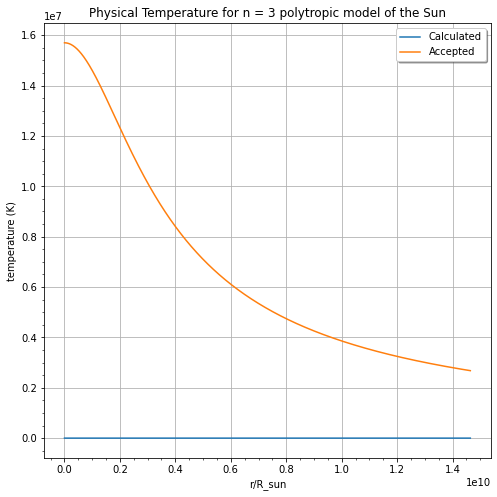

time: 564 ms (started: 2022-10-26 14:53:43 +00:00)


In [77]:
#Plot
plt.figure(figsize=(8,8))

plt.plot(ratio, temperature, label = 'Calculated')
plt.plot(ratio, exp_temp, label = 'Accepted' )
#Plotting and format
# plt.xlim(0,1)
plt.title('Physical Temperature for n = 3 polytropic model of the Sun')
plt.xlabel('r/R_sun')
plt.ylabel('temperature (K)')
legend = plt.legend(loc='upper right',shadow='True')
plt.minorticks_on()
plt.grid()
plt.show()

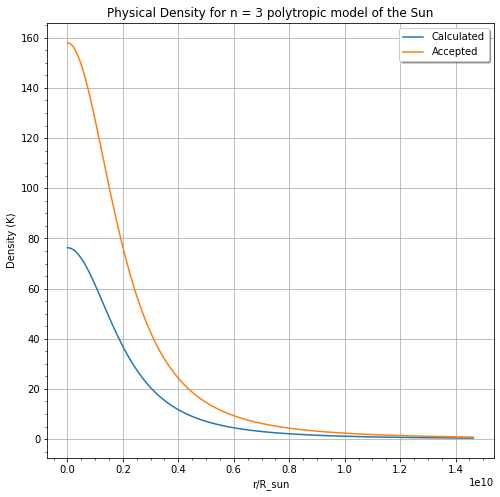

time: 340 ms (started: 2022-10-26 14:53:43 +00:00)


In [78]:
#Plot
plt.figure(figsize=(8,8))

plt.plot(ratio, density, label = 'Calculated')
plt.plot(ratio, exp_dens, label = 'Accepted' )
#Plotting and format
# plt.xlim(0,1)
plt.title('Physical Density for n = 3 polytropic model of the Sun')
plt.xlabel('r/R_sun')
plt.ylabel('Density (K)')
legend = plt.legend(loc='upper right',shadow='True')
plt.minorticks_on()
plt.grid()
plt.show()

#Part 5: Luminosity


In [80]:
#given
temp6 = 1e6
mass_frac = 0.6
exp_lum = 3.99e33 #erg/s

T = temperature/temp6
p = density

#Calulcate nuclear energy generation rate
e = 2.46e6*p**2*mass_frac**2*T**(-2/3)*np.exp(-33.81*T**(-1/3))
print(e)
print(np.exp(-33.81*T**(-1/3)))

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
time: 35.1 ms (started: 2022-10-26 14:59:27 +00:00)


#Part 6: Running Time

time: 28.1 ms (started: 2022-10-26 14:53:44 +00:00)
